![](https://github.com/sfbrigade/CA_DOJ_OpenJustice/blob/master/figure/ca_openjustice.png?raw=true)

## Prompt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import wget

import numpy as np

import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,classification_report
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from sklearn.learning_curve import learning_curve
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV

%matplotlib inline

In [20]:
wget.download("https://numeracy.co/projects/1ovzvErSiG9/all-features.csv")

'all-features.csv'

In [23]:
crime_rate_data = pd.read_csv("all-features.csv")
crime_rate_data.head(20)

,Year,Violent Crime rate,Avg unemployment,Poverty rate,GDP growth
0,1976,669.3,0.091083,NaN,NaN
1,1977,706.0,0.083167,NaN,NaN
2,1978,742.9,0.071583,NaN,NaN
3,1979,811.1,0.062417,NaN,NaN
4,1980,893.6,0.068750,0.110283,NaN
5,1981,863.0,0.074167,0.133378,NaN
6,1982,814.7,0.099750,0.141186,NaN
7,1983,772.6,0.097833,0.149191,NaN
8,1984,763.4,0.077500,0.131857,NaN
9,1985,765.3,0.071500,0.135924,NaN


## Exploratory Data Analysis

In [36]:
# crime_rate_data.head(10)

crime_rate_data.rename(inplace=True, index=str, columns={'Violent Crime rate': 'Violent_Crime_Rate',
                                                         'Avg unemployment': 'Avg_Unemployment',
                                                         'GDP growth' : 'GDP_Growth',
                                                         'Poverty rate' : 'Poverty_Rate'})

crime_rate_data.dropna(inplace=True)

In [37]:
crime_rate_data.head(10)

,Year,Violent_Crime_Rate,Avg_Unemployment,Poverty_Rate,GDP_Growth
12,1988,929.8,0.052750,0.132364,0.031
13,1989,977.7,0.051167,0.128535,0.011
14,1990,1045.2,0.057833,0.138686,0.004
15,1991,1089.9,0.077750,0.156987,-0.031
16,1992,1119.7,0.092917,0.163938,-0.018
17,1993,1077.8,0.094333,0.181514,-0.014
18,1994,1013.0,0.086000,0.178661,0.012
19,1995,966.0,0.078750,0.166651,0.033
20,1996,862.7,0.072500,0.169386,0.030
21,1997,798.3,0.063500,0.166043,0.045


## Pair Plot Code

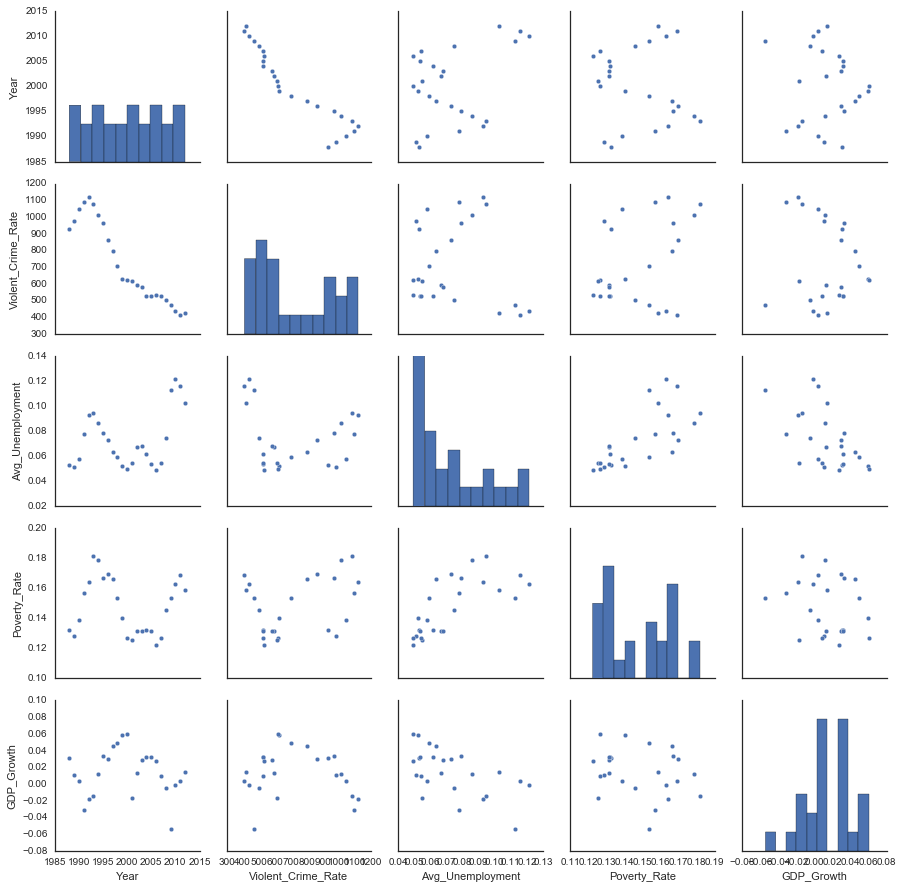

In [38]:
# Maybe not the best idea...
sns.pairplot(crime_rate_data)
plt.show()

## Linear Regression Code

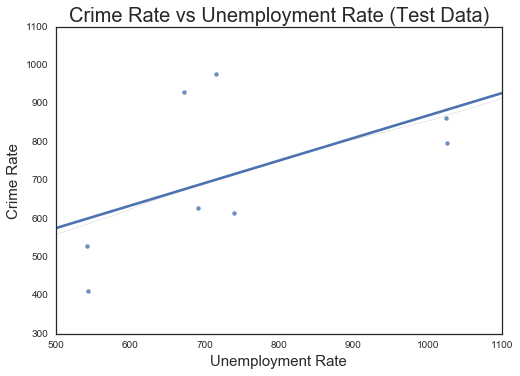

Intercept_ :  -681.776520523
('Avg_Unemployment', -13471.413673265426)
('Poverty_Rate', 16595.545320712619)
('GDP_Growth', -4268.2676570764334)
lm.rsquared :  0.131434461272




In [39]:
target = crime_rate_data['Violent_Crime_Rate']
features = ['Avg_Unemployment','Poverty_Rate','GDP_Growth']

X_train, X_test, y_train, y_test = train_test_split(crime_rate_data[features], target, test_size=0.30,random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

# Regression Plot
sns.set(style="white")
sns.regplot(y_pred,y_test,ci=0)
plt.title("Crime Rate vs Unemployment Rate (Test Data)", fontsize="20")
plt.xlabel("Unemployment Rate",fontsize="15")
plt.ylabel("Crime Rate",fontsize="15")
plt.show()

zip_features = zip(features, lm.coef_)

print ("Intercept_ : ", lm.intercept_)
for feature in zip_features:
    print(feature)
# print ("Coef_ : ", lm.coef_)
print ("lm.rsquared : ", lm.score(X_test,y_test))
print("\n")

In [10]:
# part_one = ((y_test - y_pred) ** 2).sum()
# part_two = ((y_test - y_test.mean()) ** 2).sum()

# (1 - part_one/part_two)